In [1]:
# Instalar biblioteca watermark para visualização de ambiente e versões de pacotes foram usados no projeto
# %pip install -q -U watermark

In [2]:
# Importar bibliotecas
from datetime import datetime

import pandas as pd
import numpy as np
from scipy import stats # para teste de normal (Person e Shapiro)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('future.no_silent_downcasting', True)

# Ignorar avisos que podem ocorrer durante o ajuste de algumas distribuições
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Teste de Normalidade

* Avaliar a normalidade dos dados das observações

In [3]:
# Carregar base de dados
df=pd.read_csv("heart_disease_uci_tratado_3.csv")

In [4]:
# Verificar 10  linhas aleatórias
df.sample(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num,num_reag
73,74,65,Male,Cleveland,asymptomatic,110.0,248.0,False,lv hypertrophy,158.0,False,0.6,upsloping,1,1
469,470,56,Female,Hungary,non-anginal,130.0,219.0,False,st-t abnormality,164.0,False,0.0,flat,0,0
204,205,43,Male,Cleveland,asymptomatic,110.0,211.0,False,normal,161.0,False,0.0,upsloping,0,0
885,886,48,Male,VA Long Beach,asymptomatic,140.0,223.0,False,normal,159.0,True,1.5,upsloping,3,1
532,533,43,Male,Hungary,typical angina,120.0,291.0,False,st-t abnormality,155.0,False,0.0,upsloping,1,1
407,408,49,Female,Hungary,non-anginal,130.0,207.0,False,st-t abnormality,135.0,False,0.0,upsloping,0,0
677,678,60,Male,Switzerland,asymptomatic,135.0,236.0,False,normal,63.0,True,0.5,upsloping,3,1
700,701,63,Male,Switzerland,asymptomatic,185.0,236.0,False,normal,98.0,True,0.0,upsloping,1,1
208,209,55,Male,Cleveland,atypical angina,130.0,262.0,False,normal,155.0,False,0.0,upsloping,0,0
647,648,54,Male,Switzerland,asymptomatic,180.0,236.0,False,normal,150.0,False,1.5,flat,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  num       920 non-null    int64  
 14  num_reag  920 non-null    int64  
dtypes: bool(2), float64(4), int64(4), object(5)
memory usage: 95.4+ KB


## **Teste de Normalidade**

O **teste de normalidade** é crucial, especialmente para algoritmos que dependem de inferência estatística como regressão linear, ANOVA ou testes t.

**Hipóteses do teste:**

* **Hipótese Nula (H₀)**: Os dados seguem uma distribuição normal.

* **Hipótese Alternativa (H₁)**: Os dados não seguem uma distribuição normal.

In [6]:
# Lista das colunas numéricas que queremos testar
colunas_para_testar = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [7]:
# Nível de significância
alpha = 0.05

### **Teste de D'Agostino e Pearson**

O Teste de D’Agostino-Pearson é um teste estatístico de normalidade, ou seja, ele verifica se uma variável segue aproximadamente uma distribuição normal (Gaussiana). Ele combina informações de assimetria (skewness) e curtose (kurtosis) para avaliar a normalidade dos dados.

**Como funciona o teste?**

O teste avalia se os dados da amostra têm uma **assimetria** (skewness) e **curtose** (kurtosis) semelhantes a uma **distribuição normal**. Ele nos dá duas saídas principais:

* **Estatística do teste**: Mede a magnitude do desvio em relação à normalidade. Maior o número, maior o desvio.

* **p-valor (p-value)**: Mede a significância estatística desse desvio. Ele te ajuda a decidir se o desvio é grande o suficiente para rejeitar a ideia de que os dados são normais.

In [8]:
print("--- Teste de Normalidade (D'Agostino e Pearson) ---")

# Loop para aplicar o teste em cada coluna
for coluna in colunas_para_testar:
    dados_coluna = df[coluna].dropna()
    stat, p_valor = stats.normaltest(dados_coluna)

    print(f"\nColuna: '{coluna}'")
    print(f"  - Estatística do teste = {stat:.4f}")
    print(f"  - p-valor = {p_valor:.4f}")

    if p_valor > alpha:
        print("  - Conclusão: Os dados parecem seguir uma distribuição normal (p-valor > 0.05)")
    else:
        print("  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)")

--- Teste de Normalidade (D'Agostino e Pearson) ---

Coluna: 'age'
  - Estatística do teste = 14.2411
  - p-valor = 0.0008
  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)

Coluna: 'trestbps'
  - Estatística do teste = 75.5879
  - p-valor = 0.0000
  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)

Coluna: 'chol'
  - Estatística do teste = 353.9894
  - p-valor = 0.0000
  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)

Coluna: 'thalch'
  - Estatística do teste = 13.5559
  - p-valor = 0.0011
  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)

Coluna: 'oldpeak'
  - Estatística do teste = 165.1798
  - p-valor = 0.0000
  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)


**Interpretando o p-valor**

A interpretação é baseada em um **nível de significância (alfa)**, que geralmente é definido como 0.05.

A regra é simples:

* Se o **p-valor > 0.05**: Não rejeitamos a hipótese nula. Podemos assumir que os dados são normalmente distribuídos.

* Se o **p-valor ≤ 0.05**: Rejeitamos a hipótese nula. Os dados não são normalmente distribuídos.

### **Teste de Shapiro-Wilk**
O teste de Shapiro-Wilk é o método mais recomendado para avaliar se uma distribuição dos dados se aproxima de uma distribuição normal.

In [9]:
print("--- Teste de Normalidade (Shapiro-Wilk) ---")

# Loop para aplicar o teste em cada coluna
for coluna in colunas_para_testar:
    # O teste de Shapiro-Wilk pode ser lento ou impreciso em amostras muito grandes
    # Por isso, é comum usar uma subamostra se os dados forem > 5000.
    # Com 920 registros, podemos usar a coluna inteira sem problemas.
    dados_coluna = df[coluna].dropna()

    # Aplicar o teste de Shapiro-Wilk
    stat, p_valor = stats.shapiro(dados_coluna)

    # Imprimir os resultados
    print(f"\nColuna: '{coluna}'")
    print(f"  - Estatística do teste = {stat:.4f}")
    print(f"  - p-valor = {p_valor:.4f}")

    # Interpretação do resultado
    if p_valor > alpha:
        print("  - Conclusão: Os dados parecem seguir uma distribuição normal (p-valor > 0.05)")
    else:
        print("  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)")

--- Teste de Normalidade (Shapiro-Wilk) ---

Coluna: 'age'
  - Estatística do teste = 0.9911
  - p-valor = 0.0000
  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)

Coluna: 'trestbps'
  - Estatística do teste = 0.9640
  - p-valor = 0.0000
  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)

Coluna: 'chol'
  - Estatística do teste = 0.8923
  - p-valor = 0.0000
  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)

Coluna: 'thalch'
  - Estatística do teste = 0.9915
  - p-valor = 0.0000
  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)

Coluna: 'oldpeak'
  - Estatística do teste = 0.8502
  - p-valor = 0.0000
  - Conclusão: Os dados NÃO parecem seguir uma distribuição normal (p-valor <= 0.05)


### **Visualização dos dados**

O objetivo é entender por que elas não são normais.

### Coluna: 'age'

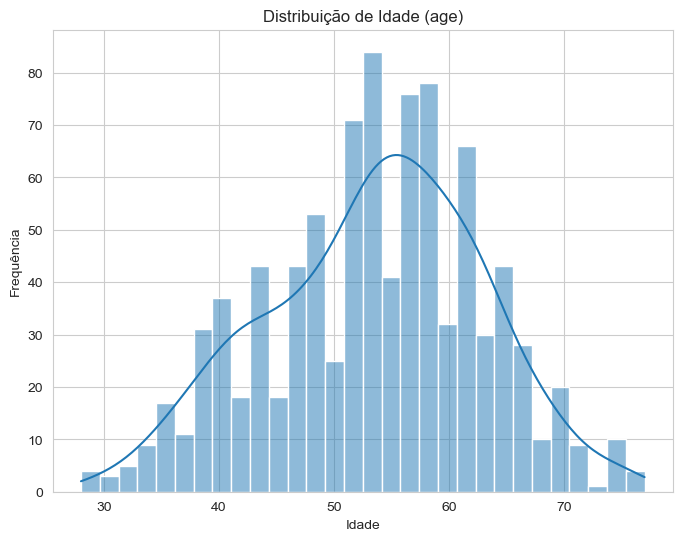

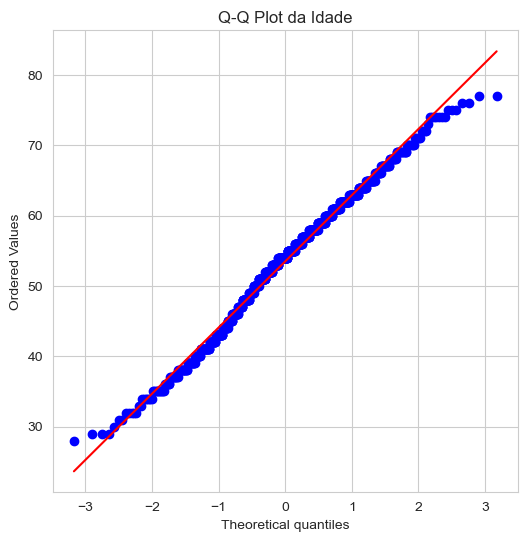

Assimetria (skewness) da coluna 'age': -0.196
Distribuição assimétrica à esquerda (cauda à esquerda).
Curtose (kurtosis) da coluna 'age': -0.383
Distribuição com caudas mais leves que a normal.


In [10]:
# Histograma
# =======================
sns.set_style("whitegrid")  # Define estilo do gráfico (fundo branco com grade leve)
plt.figure(figsize=(8, 6))
sns.histplot(df["age"], kde=True, bins=30)  # Histograma com curva de densidade
plt.title("Distribuição de Idade (age)")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# =======================
# Q-Q plot
# =======================
plt.figure(figsize=(6, 6))
stats.probplot(df["age"], dist="norm", plot=plt)  # Q-Q plot para verificar normalidade
plt.title("Q-Q Plot da Idade")
plt.show()

# =======================
# Assimetria (skewness) e Curtose (kurtosis)
# =======================
skewness = df["age"].skew()
kurtosis = df["age"].kurtosis()

print(f"Assimetria (skewness) da coluna 'age': {skewness:.3f}")
if skewness == 0:
    print("Distribuição simétrica.")
elif skewness > 0:
    print("Distribuição assimétrica à direita (cauda à direita).")
else:
    print("Distribuição assimétrica à esquerda (cauda à esquerda).")

print(f"Curtose (kurtosis) da coluna 'age': {kurtosis:.3f}")
if kurtosis == 0:
    print("Distribuição com caudas semelhantes à normal (curtose normal).")
elif kurtosis > 0:
    print("Distribuição com caudas mais pesadas que a normal (mais outliers).")
else:
    print("Distribuição com caudas mais leves que a normal.")

### Coluna: 'trestbps'

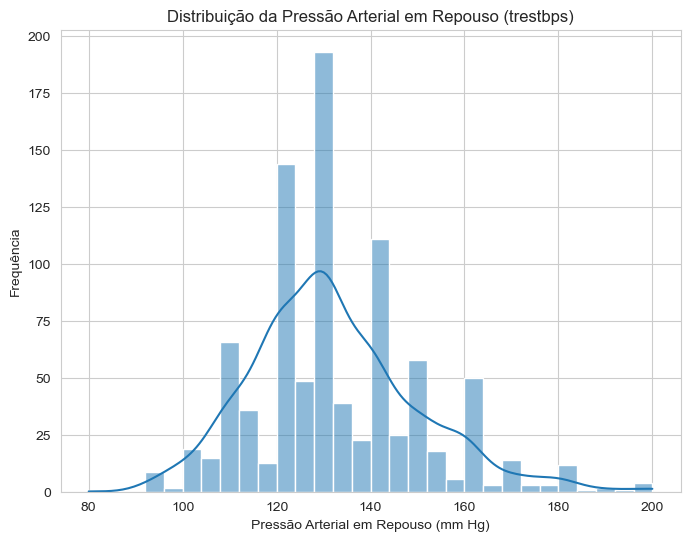

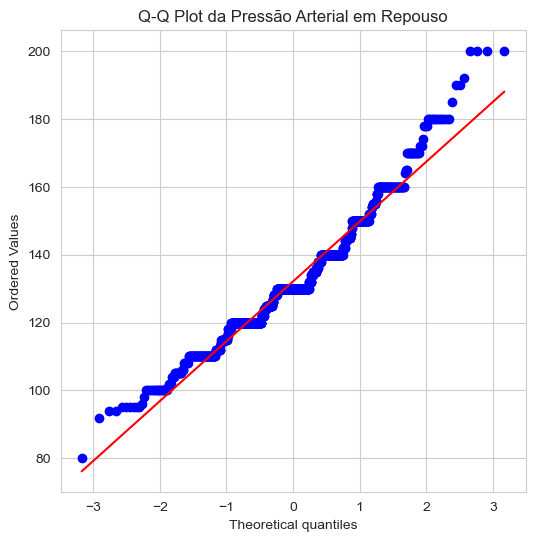

Assimetria (skewness) da coluna 'trestbps': 0.676
Distribuição assimétrica à direita (cauda à direita).
Curtose (kurtosis) da coluna 'trestbps': 0.898
Distribuição com caudas mais pesadas que a normal (mais outliers).


In [11]:
# Histograma
# =======================
sns.set_style("whitegrid")  # Define estilo visual do gráfico (fundo branco com grade leve)
plt.figure(figsize=(8, 6))
sns.histplot(df["trestbps"], kde=True, bins=30)  # Histograma com curva de densidade
plt.title("Distribuição da Pressão Arterial em Repouso (trestbps)")
plt.xlabel("Pressão Arterial em Repouso (mm Hg)")
plt.ylabel("Frequência")
plt.show()

# =======================
# Q-Q plot
# =======================
plt.figure(figsize=(6, 6))
stats.probplot(df["trestbps"], dist="norm", plot=plt)  # Q-Q plot para verificar normalidade
plt.title("Q-Q Plot da Pressão Arterial em Repouso")
plt.show()

# =======================
# Assimetria (skewness) e Curtose (kurtosis)
# =======================
skewness = df["trestbps"].skew()
kurtosis = df["trestbps"].kurtosis()

print(f"Assimetria (skewness) da coluna 'trestbps': {skewness:.3f}")
if skewness == 0:
    print("Distribuição simétrica.")
elif skewness > 0:
    print("Distribuição assimétrica à direita (cauda à direita).")
else:
    print("Distribuição assimétrica à esquerda (cauda à esquerda).")

print(f"Curtose (kurtosis) da coluna 'trestbps': {kurtosis:.3f}")
if kurtosis == 0:
    print("Distribuição com caudas semelhantes à normal (curtose normal).")
elif kurtosis > 0:
    print("Distribuição com caudas mais pesadas que a normal (mais outliers).")
else:
    print("Distribuição com caudas mais leves que a normal.")

### Coluna: 'chol'

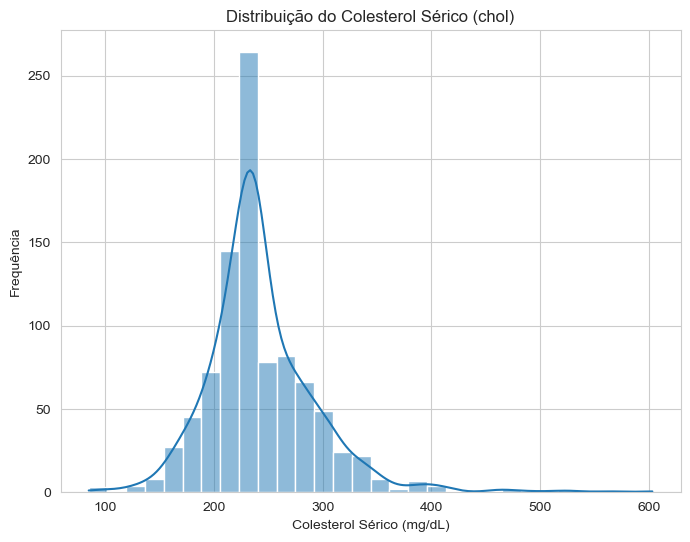

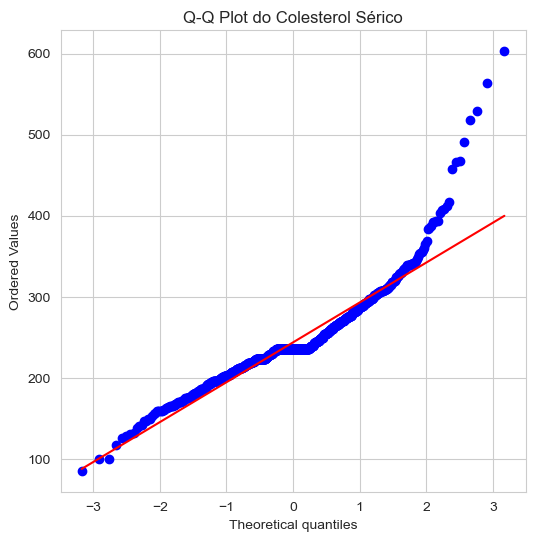

Assimetria (skewness) da coluna 'chol': 1.618
Distribuição assimétrica à direita (cauda à direita).
Curtose (kurtosis) da coluna 'chol': 7.046
Distribuição com caudas mais pesadas que a normal (mais outliers).


In [12]:
# Histograma
# =======================
sns.set_style("whitegrid")  # Define estilo visual do gráfico (fundo branco com grade leve)
plt.figure(figsize=(8, 6))
sns.histplot(df["chol"], kde=True, bins=30)  # Histograma com curva de densidade
plt.title("Distribuição do Colesterol Sérico (chol)")
plt.xlabel("Colesterol Sérico (mg/dL)")
plt.ylabel("Frequência")
plt.show()

# =======================
# Q-Q plot
# =======================
plt.figure(figsize=(6, 6))
stats.probplot(df["chol"], dist="norm", plot=plt)  # Q-Q plot para verificar normalidade
plt.title("Q-Q Plot do Colesterol Sérico")
plt.show()

# =======================
# Assimetria (skewness) e Curtose (kurtosis)
# =======================
skewness = df["chol"].skew()
kurtosis = df["chol"].kurtosis()

print(f"Assimetria (skewness) da coluna 'chol': {skewness:.3f}")
if skewness == 0:
    print("Distribuição simétrica.")
elif skewness > 0:
    print("Distribuição assimétrica à direita (cauda à direita).")
else:
    print("Distribuição assimétrica à esquerda (cauda à esquerda).")

print(f"Curtose (kurtosis) da coluna 'chol': {kurtosis:.3f}")
if kurtosis == 0:
    print("Distribuição com caudas semelhantes à normal (curtose normal).")
elif kurtosis > 0:
    print("Distribuição com caudas mais pesadas que a normal (mais outliers).")
else:
    print("Distribuição com caudas mais leves que a normal.")

### Coluna: 'thalch'

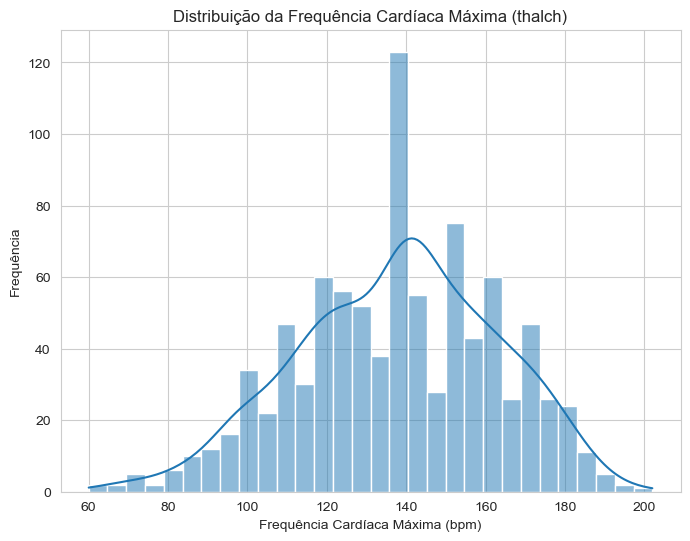

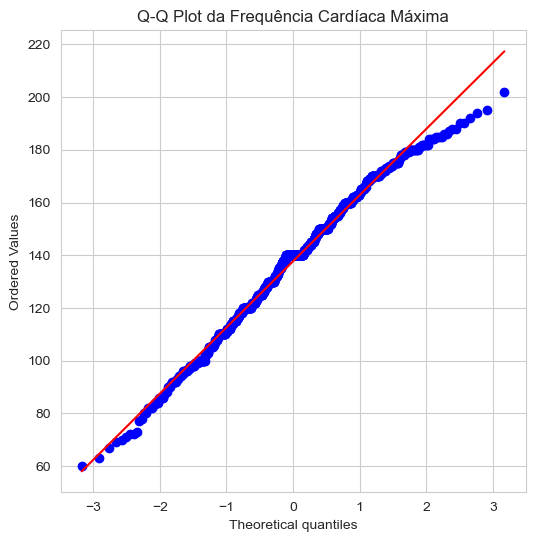

Assimetria (skewness) da coluna 'thalch': -0.235
Distribuição assimétrica à esquerda (cauda à esquerda).
Curtose (kurtosis) da coluna 'thalch': -0.317
Distribuição com caudas mais leves que a normal.


In [13]:
# Histograma
# =======================
sns.set_style("whitegrid")  # Define estilo visual do gráfico (fundo branco com grade leve)
plt.figure(figsize=(8, 6))
sns.histplot(df["thalch"], kde=True, bins=30)  # Histograma com curva de densidade
plt.title("Distribuição da Frequência Cardíaca Máxima (thalch)")
plt.xlabel("Frequência Cardíaca Máxima (bpm)")
plt.ylabel("Frequência")
plt.show()

# =======================
# Q-Q plot
# =======================
plt.figure(figsize=(6, 6))
stats.probplot(df["thalch"], dist="norm", plot=plt)  # Q-Q plot para verificar normalidade
plt.title("Q-Q Plot da Frequência Cardíaca Máxima")
plt.show()

# =======================
# Assimetria (skewness) e Curtose (kurtosis)
# =======================
skewness = df["thalch"].skew()
kurtosis = df["thalch"].kurtosis()

print(f"Assimetria (skewness) da coluna 'thalch': {skewness:.3f}")
if skewness == 0:
    print("Distribuição simétrica.")
elif skewness > 0:
    print("Distribuição assimétrica à direita (cauda à direita).")
else:
    print("Distribuição assimétrica à esquerda (cauda à esquerda).")

print(f"Curtose (kurtosis) da coluna 'thalch': {kurtosis:.3f}")
if kurtosis == 0:
    print("Distribuição com caudas semelhantes à normal (curtose normal).")
elif kurtosis > 0:
    print("Distribuição com caudas mais pesadas que a normal (mais outliers).")
else:
    print("Distribuição com caudas mais leves que a normal.")

### Coluna: 'oldpeak'

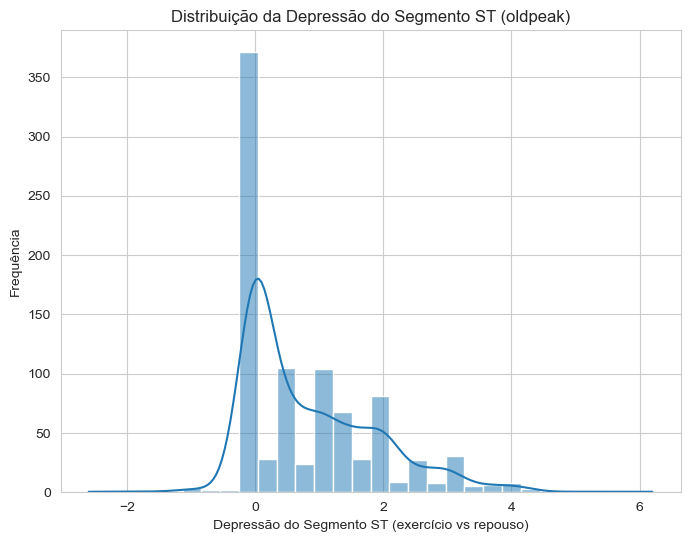

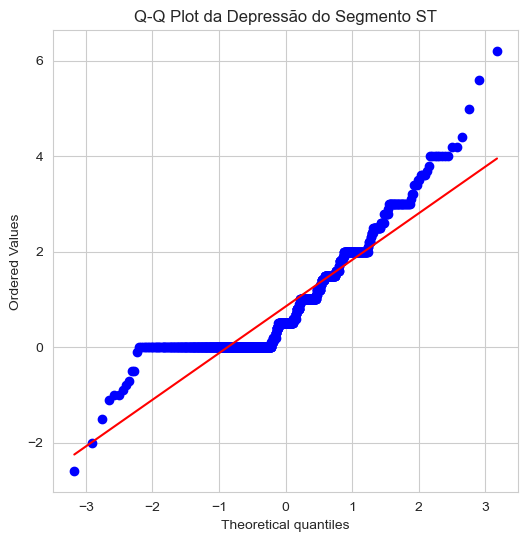

Assimetria (skewness) da coluna 'oldpeak': 1.135
Distribuição assimétrica à direita (cauda à direita).
Curtose (kurtosis) da coluna 'oldpeak': 1.461
Distribuição com caudas mais pesadas que a normal (mais outliers).


In [14]:
# Histograma
# =======================
sns.set_style("whitegrid")  # Define estilo visual do gráfico (fundo branco com grade leve)
plt.figure(figsize=(8, 6))
sns.histplot(df["oldpeak"], kde=True, bins=30)  # Histograma com curva de densidade
plt.title("Distribuição da Depressão do Segmento ST (oldpeak)")
plt.xlabel("Depressão do Segmento ST (exercício vs repouso)")
plt.ylabel("Frequência")
plt.show()

# =======================
# Q-Q plot
# =======================
plt.figure(figsize=(6, 6))
stats.probplot(df["oldpeak"], dist="norm", plot=plt)  # Q-Q plot para verificar normalidade
plt.title("Q-Q Plot da Depressão do Segmento ST")
plt.show()

# =======================
# Assimetria (skewness) e Curtose (kurtosis)
# =======================
skewness = df["oldpeak"].skew()
kurtosis = df["oldpeak"].kurtosis()

print(f"Assimetria (skewness) da coluna 'oldpeak': {skewness:.3f}")
if skewness == 0:
    print("Distribuição simétrica.")
elif skewness > 0:
    print("Distribuição assimétrica à direita (cauda à direita).")
else:
    print("Distribuição assimétrica à esquerda (cauda à esquerda).")

print(f"Curtose (kurtosis) da coluna 'oldpeak': {kurtosis:.3f}")
if kurtosis == 0:
    print("Distribuição com caudas semelhantes à normal (curtose normal).")
elif kurtosis > 0:
    print("Distribuição com caudas mais pesadas que a normal (mais outliers).")
else:
    print("Distribuição com caudas mais leves que a normal.")

### **CONCLUSÃO DO TESTE DE NORMALIDADE**

* **Conclusão principal**: Nenhuma dessas variáveis segue uma distribuição normal. Logo não é possível utilizá-los com algoritmos, modelos e testes paramétricos e que dependem de uma distribuição normal como: Regressão Linear, ANOVA, Teste-t, etc.

* **RECOMENDAÇÃO**: optar por algoritmos, modelos e testes não paramétricos e que não dependam de uma distribuição normal dos dados como: Teste de Mann-Whitney U, Kruskal-Wallis, Correlação de Spearman, Modelos preditivos (Machine Lerning), etc.

# Testar outras distribuições

* Verificar se os dados seguem as distribuições: **uniforme**, **qui-quadrada**, **exponencial**, **gama** ou **Log-normal**.

In [15]:
# Função para fazer testes de distribuição
def encontrar_melhor_distribuicao(df: pd.DataFrame, colunas: list) -> (pd.DataFrame, pd.DataFrame):
    """
    Testa várias distribuições em colunas de um DataFrame e retorna o melhor ajuste para cada uma.

    Args:
        df (pd.DataFrame): O DataFrame contendo os dados.
        colunas (list): Uma lista com os nomes das colunas numéricas a serem testadas.

    Returns:
        pd.DataFrame: Um DataFrame resumido com apenas a melhor distribuição por coluna.
        pd.DataFrame: Um DataFrame completo com os resultados de todos os testes.
    """
    distribuicoes = {
        "Normal": stats.norm,
        "Uniforme": stats.uniform,
        "Qui-Quadrado": stats.chi2,
        "Exponencial": stats.expon,
        "Gama": stats.gamma, 
        "Log-Normal": stats.lognorm
    }

    resultados = []

    print("Iniciando análise de distribuições...")
    for col in colunas:
        dados = df[col].dropna().values
        if len(dados) < 2:
            continue

        for nome, dist in distribuicoes.items():
            try:
                params = dist.fit(dados)

                # Métricas de avaliação
                log_likelihood = np.sum(dist.logpdf(dados, *params))
                k = len(params)
                n = len(dados)
                aic = 2 * k - 2 * log_likelihood
                bic = k * np.log(n) - 2 * log_likelihood

                resultados.append({
                    "Coluna": col,
                    "Distribuição": nome,
                    "LogLikelihood": log_likelihood,
                    "AIC": aic,
                    "BIC": bic,
                    "Parâmetros": params
                })
            except Exception:
                # Algumas distribuições podem falhar ao ajustar, pulamos para a próxima
                continue

    if not resultados:
        print("Nenhum resultado gerado.")
        return pd.DataFrame(), pd.DataFrame()

    df_completo = pd.DataFrame(resultados)

    # Encontra o melhor resultado (menor AIC) para cada coluna
    idx = df_completo.groupby('Coluna')['AIC'].idxmin()
    df_resumo = df_completo.loc[idx].set_index('Coluna')

    print("Análise concluída com sucesso.")
    return df_resumo, df_completo

# --- FUNÇÃO PARA VISUALIZAÇÃO ---

def plotar_melhor_fit(df: pd.DataFrame, coluna: str, df_resumo: pd.DataFrame):
    """
    Plota o histograma dos dados de uma coluna e sobrepõe a curva da melhor distribuição encontrada.
    """
    if coluna not in df_resumo.index:
        print(f"Não há resultados para a coluna '{coluna}'.")
        return

    dados = df[coluna].dropna()
    melhor_fit = df_resumo.loc[coluna]

    dist_nome = melhor_fit['Distribuição']
    params = melhor_fit['Parâmetros']

    # Map distribution names to scipy.stats functions
    dist_map = {
        "Normal": stats.norm,
        "Uniforme": stats.uniform,
        "Qui-Quadrado": stats.chi2,
        "Exponencial": stats.expon,
        "Gama": stats.gamma,
        "Log-Normal": stats.lognorm
    }
    dist_obj = dist_map.get(dist_nome)

    if dist_obj is None:
        print(f"Distribuição '{dist_nome}' não encontrada no mapeamento.")
        return

    plt.figure(figsize=(6, 4))
    sns.histplot(dados, kde=False, stat="density", label="Dados Originais (Histograma)", bins=30)

    # Gera a linha da distribuição ajustada
    x_plot = np.linspace(dados.min(), dados.max(), 200)
    y_plot = dist_obj.pdf(x_plot, *params)

    plt.plot(x_plot, y_plot, 'r-', linewidth=2, label=f"Melhor Fit: {dist_nome}")
    plt.title(f"Melhor Ajuste de Distribuição para '{coluna}'\nAIC: {melhor_fit['AIC']:.2f}", fontsize=15)
    plt.xlabel(coluna)
    plt.ylabel("Densidade")
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.3)
    plt.show()

In [16]:
# Definir as colunas que queremos testar
colunas_para_testar = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [17]:
# Aplicar a função de teste de distribuição
df_melhores_fits, df_todos_resultados = encontrar_melhor_distribuicao(df, colunas_para_testar)

Iniciando análise de distribuições...
Análise concluída com sucesso.


In [18]:
# Exibir o resultado resumido de forma clara
print("\n=======================================================")
print("     MELHOR AJUSTE DE DISTRIBUIÇÃO POR COLUNA")
print("=======================================================")
print("(Ordenado pelo menor AIC - quanto menor, melhor o ajuste)")

# Formatar a saída para melhor legibilidade
pd.options.display.float_format = '{:.2f}'.format
print(df_melhores_fits[['Distribuição', 'LogLikelihood', 'AIC', 'BIC']])


     MELHOR AJUSTE DE DISTRIBUIÇÃO POR COLUNA
(Ordenado pelo menor AIC - quanto menor, melhor o ajuste)
         Distribuição  LogLikelihood     AIC     BIC
Coluna                                              
age            Normal       -3368.79 6741.58 6751.23
chol       Log-Normal       -4872.48 9750.96 9765.44
oldpeak    Log-Normal       -1280.52 2567.04 2581.51
thalch         Normal       -4271.62 8547.24 8556.89
trestbps   Log-Normal       -3931.56 7869.13 7883.60


### **Interpretação**

* **Regra de Ouro**: Quanto **MAIOR for a LogLikelihood** (ou seja, mais próximo de zero), **MELHOR é o ajuste do modelo aos seus dados**.

* **AIC (Akaike Information Criterion)** - O AIC é focado em qualidade preditiva. Ele tenta selecionar o modelo que melhor generalizará para novos dados.

* **BIC (Bayesian Information Criterion)** - O BIC (ou Critério de Schwarz) é focado em encontrar o "modelo verdadeiro". Ele é mais rigoroso e tenta selecionar o modelo que mais provavelmente gerou os dados.

* A regra para ambos é a mesma: **quanto menor o valor do AIC ou BIC, melhor é o modelo.**


--- Visualização dos Melhores Ajustes ---


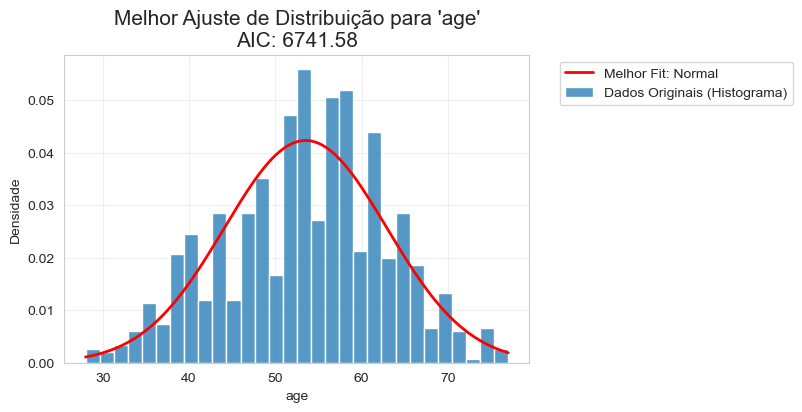

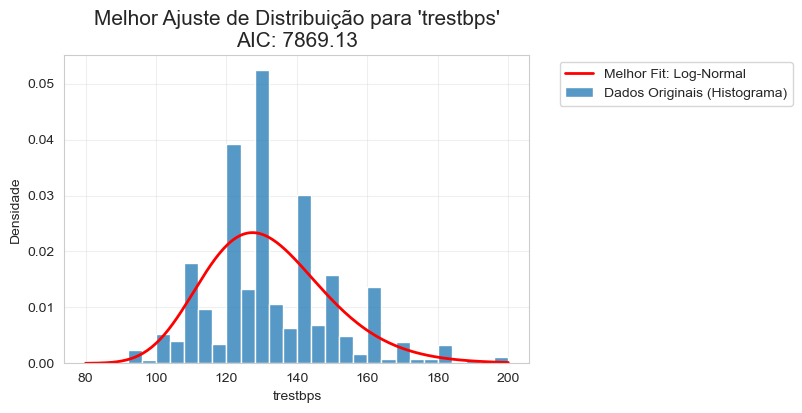

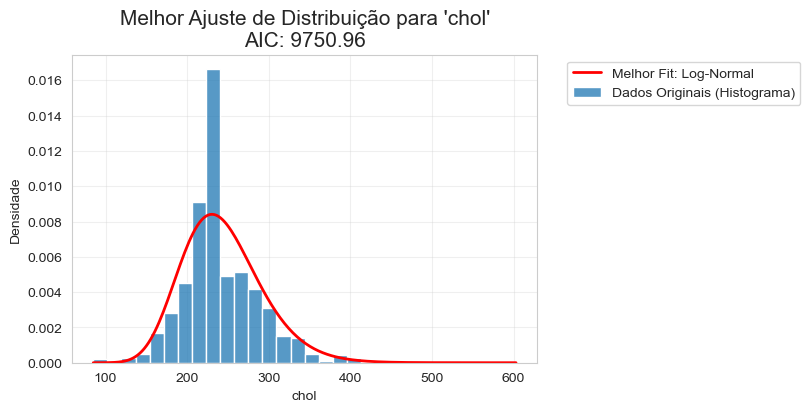

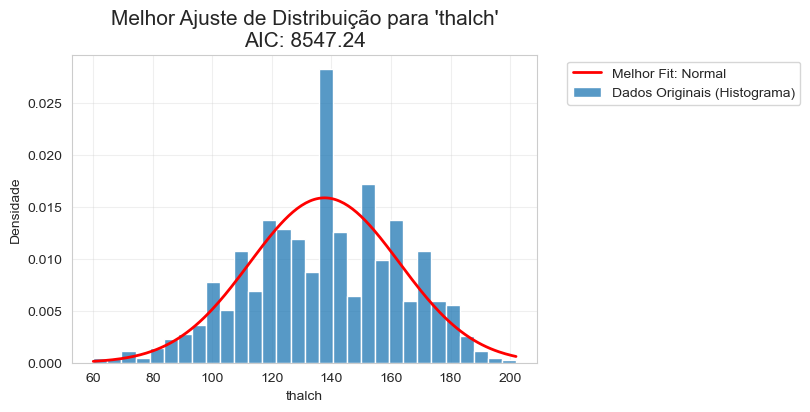

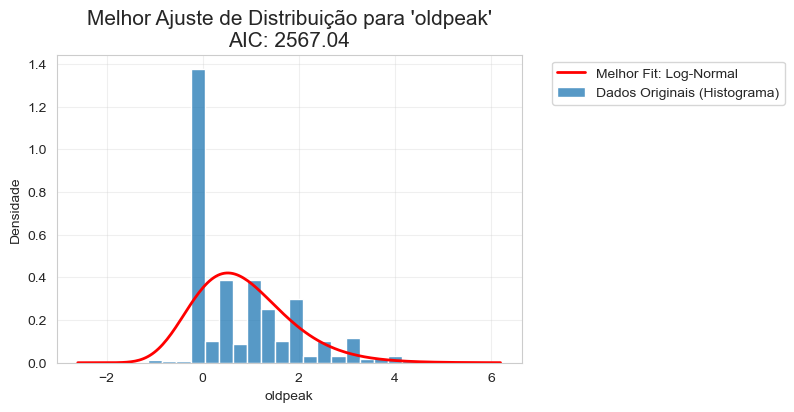

In [19]:
# Gerar gráficos para cada coluna com o seu melhor ajuste
print("\n--- Visualização dos Melhores Ajustes ---")
for col in colunas_para_testar:
    plotar_melhor_fit(df, col, df_melhores_fits)

In [20]:
# Carregando a extensão watermark
%reload_ext watermark

In [21]:
# Imprimir
# -a (autor do projeto)
# -d (data)
# -t (hora)
# -v (versões do Python e do IPython)
# -m (informações sobre a máquina (hardware e sistema operacional))
#--iversions (versões de pacotes importadas (import))
%watermark -n -a "Patrick F. R. Ribeiro" -d -t -v -m --iversions

Author: Patrick F. R. Ribeiro

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 8.30.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.10.0
scipy     : 1.15.3
seaborn   : 0.13.2
numpy     : 1.26.4
pandas    : 2.2.3

